# Organizing PoP PopCites csv files 
In PoP export as CSV the first N most cited papers in Revue Finance

For each of these papers, gather "Citing works" data

Export these (N files) as CSV

After important data script, go to ### Cleaning data and generating Interactive visualisation 3 (with journal names & citations score)

### Importing data in csv from PoP

In [1]:
import pandas as pd

# Load the base papers data
# base_papers = pd.read_csv(r"C:\Users\GODLEWSKI\OneDrive - unistra.fr\EDITORIAL & REFEREEING\Revue FINANCE\ranking\Pop\PopCites.csv") # base file with 9 most cited papers
base_papers = pd.read_csv(r"C:\Users\GODLEWSKI\OneDrive - unistra.fr\EDITORIAL & REFEREEING\Revue FINANCE\ranking\PoP\PopCites_.csv") # larger file with 21 most cited papers

# Assign unique IDs to the base papers
base_papers['Unique ID'] = range(1, len(base_papers) + 1)

# Initialize an empty DataFrame for the edges
edges = pd.DataFrame(columns=['Citing Paper Unique ID', 'Cited Paper Unique ID'])

# Loop through each of the citing papers files
for i in range(1, 22): # 10 for base file or 22 for larger file
    # Load the citing papers data
    citing_papers = pd.read_csv(fr"C:\Users\GODLEWSKI\OneDrive - unistra.fr\EDITORIAL & REFEREEING\Revue FINANCE\ranking\PoP\PopCites{i}.csv")
    
    # Assign unique IDs to the citing papers, continuing the numbering from the base papers
    citing_papers['Unique ID'] = range(len(base_papers) + 1, len(base_papers) + 1 + len(citing_papers))
    
    # Concatenate the citing papers to the base papers DataFrame
    base_papers = pd.concat([base_papers, citing_papers], ignore_index=True)
    
    # Create edges for the citing relationships
    edges = pd.concat([edges, pd.DataFrame({
        'Citing Paper Unique ID': citing_papers['Unique ID'],
        'Cited Paper Unique ID': [i] * len(citing_papers)  # Assuming the base paper has the same ID as the file number
    })], ignore_index=True)

# Save the combined papers data and the edges to new CSV files
base_papers.to_csv('UnifiedPapers.csv', index=False)
edges.to_csv('Edges.csv', index=False)


In [ ]:
pip install networkx

### Basic Network visualization 2 (with names of journals & citations scores)

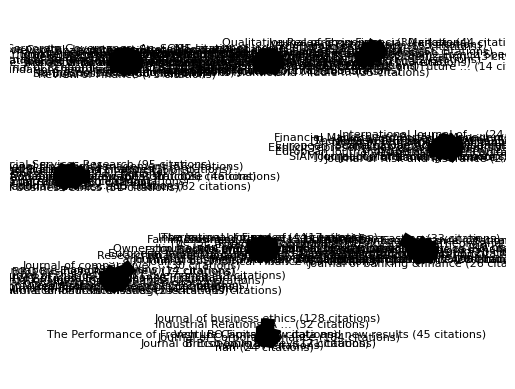

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the base papers data
base_papers = pd.read_csv('UnifiedPapers.csv')

# Load the edges data
edges = pd.read_csv('Edges.csv')

# Initialize a graph
G = nx.Graph()

# Add nodes with labels for base papers
for _, row in base_papers.iterrows():
    label = f"{row['Title']} ({row['Cites']} citations)"
    G.add_node(row['Unique ID'], label=label)

# Add edges and labels for citing papers
for _, edge in edges.iterrows():
    citing_paper = base_papers.loc[base_papers['Unique ID'] == edge['Citing Paper Unique ID']].iloc[0]
    label = f"{citing_paper['Source']} ({citing_paper['Cites']} citations)"
    G.add_node(edge['Citing Paper Unique ID'], label=label)
    G.add_edge(edge['Citing Paper Unique ID'], edge['Cited Paper Unique ID'])

# Draw the network
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes with labels
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

# Draw edges
nx.draw_networkx_edges(G, pos, width=10)

# Remove axis
plt.axis('off')

# Show the graph
plt.show()


### Interactive visualization 1

In [ ]:
pip install plotly

In [12]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go
from plotly.offline import plot

# Load the edges data
edges = pd.read_csv('Edges.csv')

# Initialize a graph
G = nx.Graph()

# Add edges to the graph
for _, edge in edges.iterrows():
    G.add_edge(edge['Citing Paper Unique ID'], edge['Cited Paper Unique ID'])

# Generate positions for each node
pos = nx.spring_layout(G)

# Prepare data for Plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        color=[],
        opacity=0.8,
        line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph of citation data',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code generated citation network visualization",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Plot the figure
plot(fig, filename='network.html')


'network.html'

### Interactive visualisation 2 (with journal names & citations score)

In [7]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go
from plotly.offline import plot

# Load the base papers data
# This is where you load your dataset containing the papers' information
base_papers = pd.read_csv('UnifiedPapers.csv')

# Load the edges data
# This is where you load your dataset containing the citation relationships between papers
edges = pd.read_csv('Edges.csv')

# Initialize a graph
# Here we initialize an empty graph where we will add our nodes and edges
G = nx.Graph()

# Add nodes with labels for base papers
# We iterate over each paper in the dataset and add it as a node to the graph
for _, row in base_papers.iterrows():
    label = f"{row['Title']} ({row['Cites']} citations)"
    G.add_node(row['Unique ID'], label=label, size=row['Cites'])

# Add edges and labels for citing papers
# We iterate over each edge in the dataset and add it to the graph
for _, edge in edges.iterrows():
    citing_paper = base_papers.loc[base_papers['Unique ID'] == edge['Citing Paper Unique ID']].iloc[0]
    label = f"{citing_paper['Source']} ({citing_paper['Cites']} citations)"
    G.add_node(edge['Citing Paper Unique ID'], label=label, size=citing_paper['Cites'])
    G.add_edge(edge['Citing Paper Unique ID'], edge['Cited Paper Unique ID'])

# Generate positions for each node using one of the layout algorithms
# The layout algorithm positions the nodes in space to make the graph visually appealing
pos = nx.spring_layout(G)

# Create edge trace
# This part of the code creates the lines that represent the edges in the graph
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create node trace
# This part of the code creates the markers that represent the nodes in the graph
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=False,  # This enables the color scale legend on the side
        colorscale='YlGnBu',  # This is the color scale for the nodes
        size=[],  # This will be filled with the sizes of the nodes
        color=[],  # This will be filled with the colors of the nodes
        opacity=0.05,  # Set the fill opacity to 0 for no fill
        line=dict(width=2, color='Red')))  # Set the line color and width for circle outlines

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['marker']['size'] += (G.nodes[node]['size'],)
    node_trace['text'] += (G.nodes[node]['label'],)

# Create the figure
# This part of the code sets up the layout and appearance of the graph
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Network graph of citation data (selection) for Revue Finance ISSN 0752-6180',
                    titlefont_size=20,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Generated using Python and Plotly on Visual Studio Code with Copilot AI assistance by C. Godlewski",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Plot the figure
# This line of code generates the HTML file that contains the interactive graph
plot(fig, filename='network.html')


'network.html'

### Cleaning data and generating Interactive visualisation 3 (with journal names & citations score)
USE THIS

In [29]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go
from plotly.offline import plot

# Load the data
base_papers = pd.read_csv('UnifiedPapers.csv')
edges = pd.read_csv('Edges.csv')

# Function to standardize author names
def standardize_authors(name):
    # Remove asterisks and standardize the format
    name = name.replace('*', '').strip()  # Strip to remove any leading/trailing whitespace
    name = name.replace('1', '')
    name = name.replace('2', '')
    name = name.replace('3', '')
    # Convert to lowercase and split by spaces
    parts = name.lower().split()
    # Remove middle initials and suffixes if needed
    # Reorder to 'Lastname, Firstname' if needed
    return ' '.join(parts)

# Apply the standardization function to the Authors column
base_papers['Authors'] = base_papers['Authors'].apply(standardize_authors)

def standardize_journal(name):
    # Check if 'name' is a string instance to avoid AttributeError
    if isinstance(name, str) and not pd.isna(name):
        # Convert to lowercase, replace '&' with 'and', remove punctuation, etc.
        name = name.lower().replace('&', 'and ').replace('.', '').replace(',', '').strip()
        # Use consistent abbreviations
        # Example: 'journal of' -> 'j'
        # name = name.replace('journal of', 'j')
        return name
    else:
        # If 'name' is not a string (e.g., NaN), return it as is
        return None

# Apply the standardization function to the Source column
base_papers['Source'] = base_papers['Source'].apply(standardize_journal)
base_papers = base_papers.dropna(subset=['Source'])

# Filter out citing papers with an empty Source
edges = edges[edges['Citing Paper Unique ID'].isin(base_papers[base_papers['Source'] != '']['Unique ID'])]

# Initialize a graph
G = nx.Graph()

# Function to format the authors string
def format_authors(authors_list):
    if len(authors_list) > 2:
        return f"{authors_list[0]} et al."
    else:
        return ', '.join(authors_list)

# Add nodes with labels, sizes, and additional details for base papers
for _, row in base_papers.iterrows():
    authors = row['Authors'].split('; ')  # Assuming authors are separated by semicolons
    authors_formatted = format_authors(authors)
    label = f"<b>{row['Title']}</b>\n{authors_formatted} ({row['Year']})"
    G.add_node(row['Unique ID'], label=label, size=row['Cites'])

# Add edges and labels for citing papers
for _, edge in edges.iterrows():
    citing_paper = base_papers.loc[base_papers['Unique ID'] == edge['Citing Paper Unique ID']].iloc[0]
    label = f"{citing_paper['Source']} ({citing_paper['Cites']} citations)"
    G.add_node(edge['Citing Paper Unique ID'], label=label, size=citing_paper['Cites'])
    G.add_edge(edge['Citing Paper Unique ID'], edge['Cited Paper Unique ID'])

# Generate positions for each node using a layout algorithm
pos = nx.spring_layout(G)

# Create edge trace
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create node trace
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    # mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,  # Enable the color scale legend
        colorscale='OrRd',  # Color scale for the nodes
        size=[],  # Sizes of the nodes
        color=[],  # Colors of the nodes
        opacity=0.5,  # Adjusted opacity for better visibility
        line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['marker']['size'] += (G.nodes[node]['size'],)
    node_trace['marker']['color'] += (G.nodes[node]['size'],)  # Map the node size to color
    node_trace['text'] += (G.nodes[node]['label'],)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Network graph of citation data for top cited papers (2008-2023) in <a href="https://www.cairn-int.info/journal-finance.htm">Revue Finance</a> [ISSN 0752-6180]',
                    titlefont_size=20,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Generated using Python and Plotly on Visual Studio Code with Copilot assistance by C. Godlewski. Use the menu in top right corner to zoom in and out. [Based on Google Scholar data from Harzing PoP. 21 most cited papers (with h-markers) from Revue Finance (2008-2023) and most cited citing papers (with h-markers).] ",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Plot the figure
# plot(fig, filename='network.html') #base file with 9 most cited papers in RF
plot(fig, filename='network_.html') #file with 21 most cited papers in RF


'network_.html'

### Interactive visualisation 4 (with journal names & citations score & authors etc.)

In [4]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go
from plotly.offline import plot

# Load the data
base_papers = pd.read_csv('UnifiedPapers.csv')
edges = pd.read_csv('Edges.csv')

# Initialize a graph
G = nx.Graph()

# Function to format the authors string
def format_authors(authors_list):
    if len(authors_list) > 2:
        return f"{authors_list[0]} et al."
    else:
        return ', '.join(authors_list)

# Add nodes with labels, sizes, and additional details for base papers
for _, row in base_papers.iterrows():
    authors = row['Authors'].split('; ')  # Assuming authors are separated by semicolons
    authors_formatted = format_authors(authors)
    label = f"<b>{row['Title']}</b>\n{authors_formatted} ({row['Year']})"
    G.add_node(row['Unique ID'], label=label, size=row['Cites'])

# Add edges and labels with full citation for citing papers
for _, edge in edges.iterrows():
    citing_paper = base_papers.loc[base_papers['Unique ID'] == edge['Citing Paper Unique ID']].iloc[0]
    authors = citing_paper['Authors'].split('; ')
    authors_formatted = format_authors(authors)
    label = f"{citing_paper['Source']}\n{authors_formatted}, **{citing_paper['Title']}**, {citing_paper['Year']}"
    G.add_node(edge['Citing Paper Unique ID'], label=label, size=citing_paper['Cites'])
    G.add_edge(edge['Citing Paper Unique ID'], edge['Cited Paper Unique ID'])

# Generate positions for each node using a layout algorithm
pos = nx.spring_layout(G)

# Create edge trace
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create node trace
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,  # Enable the color scale legend
        colorscale='YlGnBu',  # Color scale for the nodes
        size=[],  # Sizes of the nodes
        color=[],  # Colors of the nodes
        opacity=0.8,  # Adjusted opacity for better visibility
        line=dict(width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['marker']['size'] += (G.nodes[node]['size'],)
    node_trace['marker']['color'] += (G.nodes[node]['size'],)  # Map the node size to color
    node_trace['text'] += (G.nodes[node]['label'],)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Network graph of citation data for Revue Finance ISSN 0752-6180',
                    titlefont_size=20,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Generated using Python and Plotly",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Plot the figure
plot(fig, filename='network.html')


'network.html'